In [303]:
import pandas as pd
import numpy as np

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [343]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gen_sub = pd.read_csv('gender_submission.csv')

In [344]:
df = df.drop(columns= ["Ticket", 'Cabin', 'Embarked', 'Name'])


In [345]:
df.apply(lambda x: x.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [346]:
#df.Sex = df.Sex.map({'male':1, 'female':0})
sex = pd.get_dummies(df.Sex, dtype = 'int')
pclass = pd.get_dummies(df.Pclass, dtype = 'int')
df = pd.concat([df, sex, pclass], axis = 1).drop(columns = ["Sex", 'PassengerId', 'Pclass'])
df = df.rename(columns = {1: 'first', 2:'second', 3:'third'})

In [347]:
df.head()

,Survived,Age,SibSp,Parch,Fare,female,male,first,second,third
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1


In [348]:
means = df.groupby(["Survived", 'male']).Age.mean()
means

Survived  male
0         0       25.046875
          1       31.618056
1         0       28.847716
          1       27.276022
Name: Age, dtype: float64

In [349]:
df.Age = df.apply(lambda x: means.loc[x.Survived, x.male] if np.isnan(x.Age) else x, axis = 1).Age

In [350]:
df.apply(lambda x: x.isnull().sum())

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
first       0
second      0
third       0
dtype: int64

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   female    891 non-null    int64  
 6   male      891 non-null    int64  
 7   first     891 non-null    int64  
 8   second    891 non-null    int64  
 9   third     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [351]:
x_train = df.loc[:, df.columns != 'Survived']
y_train = df.Survived

x_train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'first', 'second',
       'third'],
      dtype='object')

<Axes: >

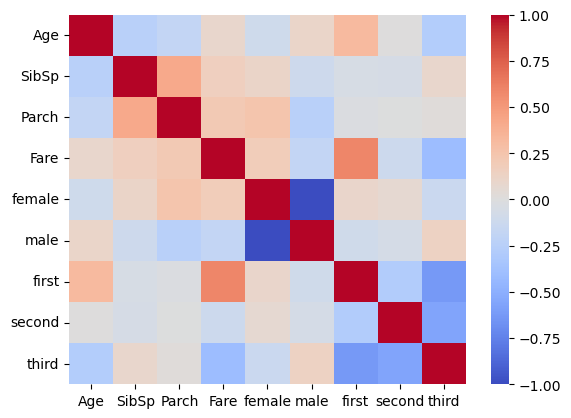

In [352]:
corrmap = x_train.corr()

sns.heatmap(corrmap, cmap = 'coolwarm')

In [317]:
#x_train = x_train.drop(columns = ['female', 'first'])

In [354]:
tree = DecisionTreeClassifier()

In [355]:
params = {
    'max_depth': range(1, 10)
}

In [356]:
gs = GridSearchCV(estimator=tree, 
                  param_grid = params, 
                  scoring = ['accuracy', 'f1'],
                  refit = 'accuracy',
                  cv = 5,
                  verbose = 4
                  )

In [357]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=1; accuracy: (test=0.804) f1: (test=0.745) total time=   0.0s
[CV 2/5] END max_depth=1; accuracy: (test=0.803) f1: (test=0.737) total time=   0.0s
[CV 3/5] END max_depth=1; accuracy: (test=0.787) f1: (test=0.712) total time=   0.0s
[CV 4/5] END max_depth=1; accuracy: (test=0.753) f1: (test=0.645) total time=   0.0s
[CV 5/5] END max_depth=1; accuracy: (test=0.787) f1: (test=0.708) total time=   0.0s
[CV 1/5] END max_depth=2; accuracy: (test=0.749) f1: (test=0.526) total time=   0.0s
[CV 2/5] END max_depth=2; accuracy: (test=0.792) f1: (test=0.661) total time=   0.0s
[CV 3/5] END max_depth=2; accuracy: (test=0.787) f1: (test=0.716) total time=   0.0s
[CV 4/5] END max_depth=2; accuracy: (test=0.753) f1: (test=0.645) total time=   0.0s
[CV 5/5] END max_depth=2; accuracy: (test=0.787) f1: (test=0.708) total time=   0.0s
[CV 1/5] END max_depth=3; accuracy: (test=0.816) f1: (test=0.752) total time=   0.0s
[CV 2

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)}, refit='accuracy',
             scoring=['accuracy', 'f1'], verbose=4)

In [358]:
besttree = gs.best_estimator_
gs.best_params_

{'max_depth': 9}

In [359]:
nt = DecisionTreeClassifier(max_depth=5)

In [360]:
nt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [361]:
besttree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [362]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [363]:
sex = pd.get_dummies(test.Sex, dtype = 'int')
pclass = pd.get_dummies(test.Pclass, dtype = 'int')
test = pd.concat([test, sex, pclass], axis = 1).drop(columns = ["Sex", 'Pclass'])
test = test.merge(gen_sub, left_on='PassengerId', right_on='PassengerId').set_index('PassengerId')
test = test.rename(columns = {1:'first', 2:'second', 3:'third'})

In [366]:
test.head()

,Age,SibSp,Parch,Fare,female,male,first,second,third,Survived
PassengerId,,,,,,,,,,
892,34.5,0,0,7.8292,0,1,0,0,1,0
893,47.0,1,0,7.0000,1,0,0,0,1,1
894,62.0,0,0,9.6875,0,1,0,1,0,0
895,27.0,0,0,8.6625,0,1,0,0,1,0
896,22.0,1,1,12.2875,1,0,0,0,1,1


In [365]:
#test = test.drop(columns= ["Ticket", 'Cabin', 'Embarked', 'Name', 'female', 'first'])
test = test.drop(columns= ["Ticket", 'Cabin', 'Embarked', 'Name'])

In [370]:
test.shape[0] - test.count()

Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
first       0
second      0
third       0
Survived    0
dtype: int64

In [368]:
test.groupby(['male']).Age.median()

male
0    27.0
1    27.0
Name: Age, dtype: float64

In [369]:
test.Age = test.Age.fillna(27)
test.Fare = test.Fare.fillna(test.Fare.mean())

In [371]:
x_test = test.drop(columns=['Survived'])
y_test = test.Survived

In [372]:
besttree.score(x_test, y_test)

0.7703349282296651

In [373]:
nt.score(x_test, y_test)

0.930622009569378

In [374]:
test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'first', 'second',
       'third', 'Survived'],
      dtype='object')

In [375]:
test = test.assign(prds = nt.predict(x_test))
test.drop(columns=['Survived']).rename(columns = {'prds': 'Survived'}).Survived.to_csv("predict.csv")

In [ ]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    # needs graphviz to be installed
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [ ]:
tree_graph_to_png(besttree, ['Pclass', 'Sex','Age','SibSp', 'Parch', 'Fare'], 'aboba.png')

In [ ]:
besttree.get_n_leaves

<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01,
                       random_state=17)>